# Surface parameters inference

This notebooks presents the different tools that ArchPy offers to infer the variogram of the surfaces.
It goes from manual tools where the variogram have to be adjusted manually using sliders to automatic inference where little or no user intervention is required.

<div class="alert alert-warning">

WARNING: Interactive tools do not work anymore and only automatic inference is available. This notebook is deprecated for now and will be updated soon.
    
</div>

In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys

sys.path.append("../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *

In [2]:
PD = Pile(name = "PD", seed = 10)
PB = Pile(name = "PB",seed=1)
P1 = Pile(name = "P1",seed=1)

In [3]:
#grid
sx = 0.75
sy = 0.75
sz = .15
x1 = 100
y1 = 50
z1 = -6
x0 = 0
y0 = 0
z0 = -15
nx = 133
ny = 67
nz = 62


dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

In [4]:
#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[30,30]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[40,40]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[50,50]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential",{"w":.25,"r":[50,50,15]})],alpha=0,name="vario_SIS") # input variogram
covmodel_SIS_D = gcm.CovModel3D(elem=[("exponential",{"w":.25,"r":[25,25,25]})],alpha=0,name="vario_SIS") # input variogram
lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelD=[covmodel_SIS_D]


#create Lithologies 
dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"SubPile", "SubPile": PD}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC}
dic_f_C = {"f_method" : "SIS","neig" : 10,"f_covmodel":covmodel_SIS_C}
C = Unit(name="C",order=2,ID = 2,color="blue",contact="onlap",dic_facies=dic_f_C,surface=Surface(dic_surf=dic_s_C,contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB}
dic_f_B = {"f_method":"SubPile","SubPile":PB}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

# PB
ds_B3 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B3 = {"f_method":"SIS", "neig" : 10,"f_covmodel":covmodel_SIS_D}
B3 = Unit(name = "B3",order=1,ID = 6,color="forestgreen",surface=Surface(dic_surf=ds_B3,contact="onlap"),dic_facies=df_B3)

ds_B2 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B2 = {"f_method":"SIS","neig" : 10,"f_covmodel":covmodel_SIS_D}
B2 = Unit(name = "B2",order=2,ID = 7,color="limegreen",surface=Surface(dic_surf=ds_B2,contact="erode"),dic_facies=df_B2)

ds_B1 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B1 = {"f_method":"SIS","neig" : 10,"f_covmodel":covmodel_SIS_D}
B1 = Unit(name = "B1",order=3, ID = 8,color="palegreen",surface=Surface(dic_surf=ds_B1,contact="onlap"),dic_facies=df_B1)

## Subpile
PB.add_unit([B3,B2,B1])


# PD
ds_D2 = {"int_method":"grf_ineq","covmodel":covmodelD1}
df_D2 = {"f_method":"SIS","neig" : 20,"f_covmodel":covmodel_SIS_D}
D2 = Unit(name = "D2", order=1, ID = 9,color="darkgoldenrod",surface=Surface(dic_surf=ds_D2,contact="onlap"),dic_facies=df_D2)

ds_D1 = {"int_method":"grf_ineq","covmodel":covmodelD1}
df_D1 = {"f_method":"SIS","neig" : 20,"f_covmodel":covmodel_SIS_D}
D1 = Unit(name = "D1", order=2, ID = 10,color="yellow",surface=Surface(dic_surf=ds_D1,contact="onlap"),dic_facies=df_D1)

PD.add_unit([D2, D1])

Unit D: Surface added for interpolation
Unit C: covmodel for SIS added
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added
Unit B3: covmodel for SIS added
Unit B3: Surface added for interpolation
Unit B2: covmodel for SIS added
Unit B2: Surface added for interpolation
Unit B1: covmodel for SIS added
Unit B1: Surface added for interpolation
Stratigraphic unit B3 added
Stratigraphic unit B2 added
Stratigraphic unit B1 added
Unit D2: covmodel for SIS added
Unit D2: Surface added for interpolation
Unit D1: covmodel for SIS added
Unit D1: Surface added for interpolation
Stratigraphic unit D2 added
Stratigraphic unit D1 added


In [5]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[30,30,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[20,20, 5]})],alpha=0,name="K_vario_2")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1,facies_2,facies_3,facies_5])
D.add_facies([facies_1,facies_2,facies_3,facies_5])
C.add_facies([facies_4,facies_6])

#add same facies than B
for b in PB.list_units:
    b.add_facies(B.list_facies)

#same for D
for d in PD.list_units:
    d.add_facies(D.list_facies)
    
permea = Prop("K",[facies_1,facies_2,facies_3,facies_4,facies_5,facies_6,facies_7],
                  [covmodelK2,covmodelK,covmodelK,None,covmodelK2,covmodelK,None],
                  means=[-3.5,-2,-4.5,-8,-5.5,-6.5,-10],
                  int_method = ["sgs","sgs","sgs","homogenous","sgs","sgs","homogenous"],
                  def_mean=-5)

Facies basement added to unit A
Facies Sand added to unit B
Facies Gravel added to unit B
Facies GM added to unit B
Facies SM added to unit B
Facies Sand added to unit D
Facies Gravel added to unit D
Facies GM added to unit D
Facies SM added to unit D
Facies Clay added to unit C
Facies Silt added to unit C
Facies Sand added to unit B3
Facies Gravel added to unit B3
Facies GM added to unit B3
Facies SM added to unit B3
Facies Sand added to unit B2
Facies Gravel added to unit B2
Facies GM added to unit B2
Facies SM added to unit B2
Facies Sand added to unit B1
Facies Gravel added to unit B1
Facies GM added to unit B1
Facies SM added to unit B1
Facies Sand added to unit D2
Facies Gravel added to unit D2
Facies GM added to unit D2
Facies SM added to unit D2
Facies Sand added to unit D1
Facies Gravel added to unit D1
Facies GM added to unit D1
Facies SM added to unit D1


In [6]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [7]:
#logs strati
log_strati1 = [(C,-6.01),(B3,-8),(B2,-9),(B1,-9.5),(A,-10)]
log_strati2 = [(C,-6.01),(B3,-8.5),(B2,-9.5),(A,-10.5)]
log_strati3 = [(D2,-6.01), (D1, -7), (B3,-8),(B2,-8.5),(B1,-9.5),(A,-10.5)]
log_strati4 = [(D2,-6.01), (D1, -7), (B3,-9),(B2,-10),(A,-11)]
log_strati5 = [(D2,-6.01), (D1, -7), (C,-10),(A,-12)]
log_strati6 = [(D2,-6.01), (D1, -7), (A,-9)]

# logs facies
log_facies1 = [(facies_4,-6.01),(facies_6,-6.5),(facies_4,-7),(facies_6,-7.5), # facies in unit C
               (facies_1,-8),(facies_5,-8.5),(facies_2,-9),(facies_3,-9.3),  # facies in unit B
               (facies_7,-10)]
log_facies2 = [(facies_4,-6.01),(facies_6,-7.3),(facies_4,-7.6),(facies_6,-8),
               (facies_2,-8.5),(facies_1,-8.8),(facies_2,-9),(facies_3,-9.2),(facies_1,-10),
               (facies_7,-10.5)]
log_facies3 = [(facies_1,-6.015),(facies_2,-6.8),(facies_5,-7),(facies_3,-7.3),(facies_1,-7.5),
               (facies_2,-8),(facies_1,-8.8),(facies_2,-9),(facies_3,-9.2),(facies_1,-10),
              (facies_7,-10.5)]
log_facies4 = [(facies_1,-6.01),(facies_2,-7.5),(facies_5,-7.8),(facies_3,-8),(facies_5,-8.3),(facies_1,-8.7),
               (facies_2,-9),(facies_1,-10),(facies_2,-10.5),
               (facies_7,-11)]
log_facies5 = [(facies_5,-6.01),(facies_1,-7.5),(facies_3,-7.8),(facies_2,-8),(facies_1,-8.3),(facies_2,-8.7),(facies_1,-9),(facies_5,-9.5),
               (facies_4,-10),(facies_6,-10.4),(facies_4,-11),
               (facies_7,-12)]
log_facies6 = [(facies_1,-6.01),(facies_2,-8.3),(facies_3,-8.5),(facies_2,-8.7),
               (facies_7,-9)]

#create boreholes
bh1 = borehole("b1",1,x=5,y=25,z=log_strati1[0][1],depth =9,log_strati=log_strati1,log_facies=log_facies1)
bh2 = borehole("b2",2,x=15,y=10,z=log_strati2[0][1],depth =8,log_strati=log_strati2,log_facies=log_facies2)
bh3 = borehole("b3",3,x=25,y=30,z=log_strati3[0][1],depth =7,log_strati=log_strati3,log_facies=log_facies3)
bh4 = borehole("b4",4,x=50,y=5,z=log_strati4[0][1],depth =8,log_strati=log_strati4,log_facies=log_facies4)
bh5 = borehole("b5",5,x=75,y=15,z=log_strati5[0][1],depth =8,log_strati=log_strati5,log_facies=log_facies5)
bh6 = borehole("b6",6,x=90,y=45,z=log_strati6[0][1],depth =6,log_strati=log_strati6,log_facies=log_facies6)

In [8]:
T1 = Arch_table(name = "P1",seed=1)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot)
T1.rem_all_bhs()
T1.add_bh([bh1,bh2,bh3,bh4,bh5,bh6])
T1.add_prop([permea])

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Standard boreholes removed
Fake boreholes removed
Geological map boreholes removed
Borehole 1 goes below model limits, borehole 1 depth cut
Borehole 1 added
Borehole 2 added
Borehole 3 added
Borehole 4 added
Borehole 5 added
Borehole 6 added
Property K added


In [9]:
T1.reprocess()

Hard data reset
##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n
Pile PD: ordering units
Stratigraphic units have been sorted according to order
Pile PB: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set
First altitude in log facies of bh 3 is not set at the top of the borehole, altitude changed

 ## Computing distributions for Normal Score Transform ##

Processing ended successfully


In [10]:
T1.order_Piles()

##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Pile PD: ordering units
Stratigraphic units have been sorted according to order
Pile PB: ordering units
Stratigraphic units have been sorted according to order


In [11]:
T1.hierarchy_relations()

hierarchical relations set


In [12]:
import warnings
warnings.filterwarnings("ignore")
pv.set_jupyter_backend('static')

In [13]:
T1.compute_surf(1)

########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.016956329345703125 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.0854194164276123 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.1134033203125 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.06853652000427246 s
##########################

########## PILE PD ##########
Pile PD: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT D1
D1: time elapsed for computing surface 0.014959573745727539 s

#### COMPUTING SURFACE OF UNIT D2
D2: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.021096467971801758 s
##########################

########## PILE PB ##########
Pile PB: ordering units
Stratigraphic units have

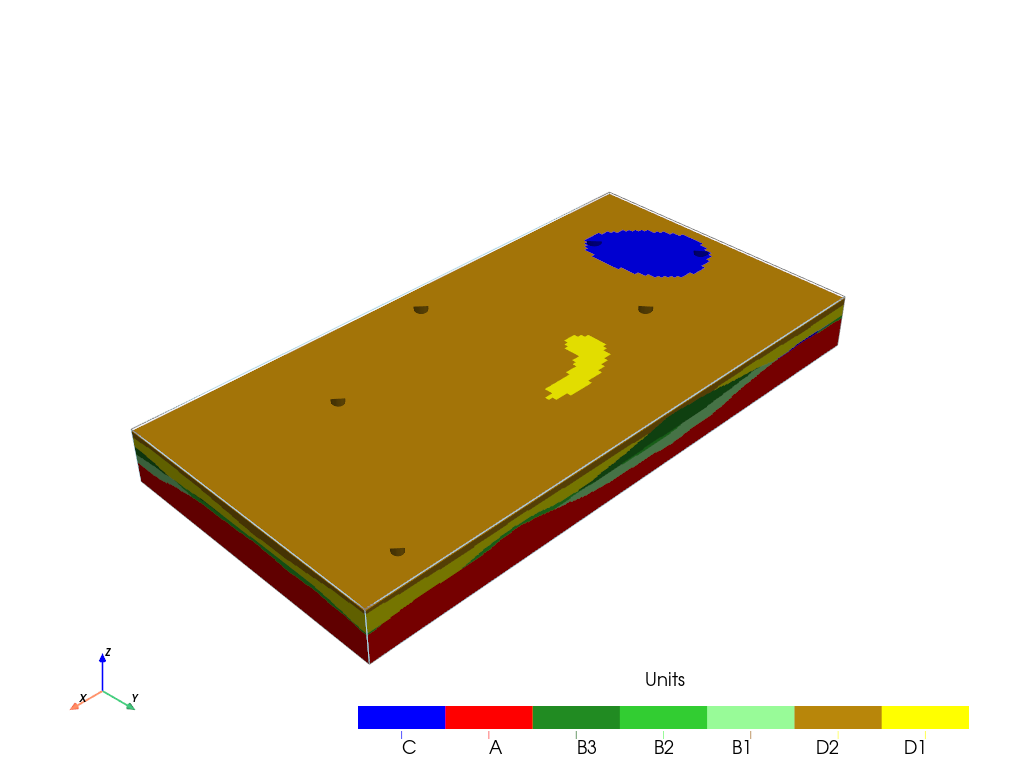

In [14]:
p = pv.Plotter()
T1.plot_units(0, plotter=p)
p.add_bounding_box()
T1.plot_bhs(plotter=p)
p.show()

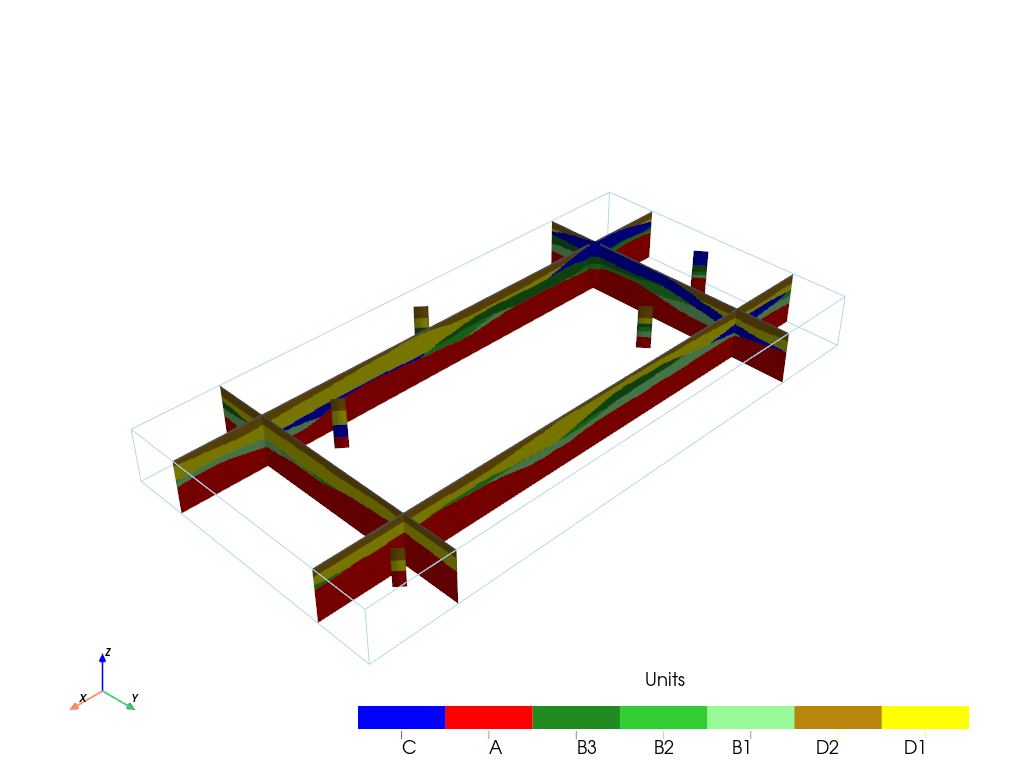

In [15]:
p=pv.Plotter()

T1.plot_bhs(plotter=p)
T1.plot_units(iu=0, plotter=p, slicex=(0.15, 0.85), slicey=(0.2, 0.8))

p.show()

In [16]:
T1.compute_facies(1, verbose_methods=2)


### Unit D: facies simulation with SubPile method ####
SubPile filling method, nothing happened
Time elapsed 0.0 s

### Unit C: facies simulation with SIS method ####
### Unit C - realization 0 ###
Only one facies covmodels for multiples facies, adapt sill to right proportions
Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20240322 / OpenMP 7 thread(s)]
Geos-Classic run complete
Time elapsed 2.24 s

### Unit B: facies simulation with SubPile method ####
SubPile filling method, nothing happened
Time elapsed 0.0 s

### Unit A: facies simulation with homogenous method ####
### Unit A - realization 0 ###
Time elapsed 0.02 s

### Unit D2: facies simulation with SIS method ####
### Unit D2 - realization 0 ###
Only one facies covmodels for multiples facies, adapt sill to right proportions
Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20240322 / OpenMP 7 thread(s)]
Geos-Classic run complete
Time elapsed 4.38 s

### Unit D1: facies simulation with SIS method ####
### Unit D1 - reali

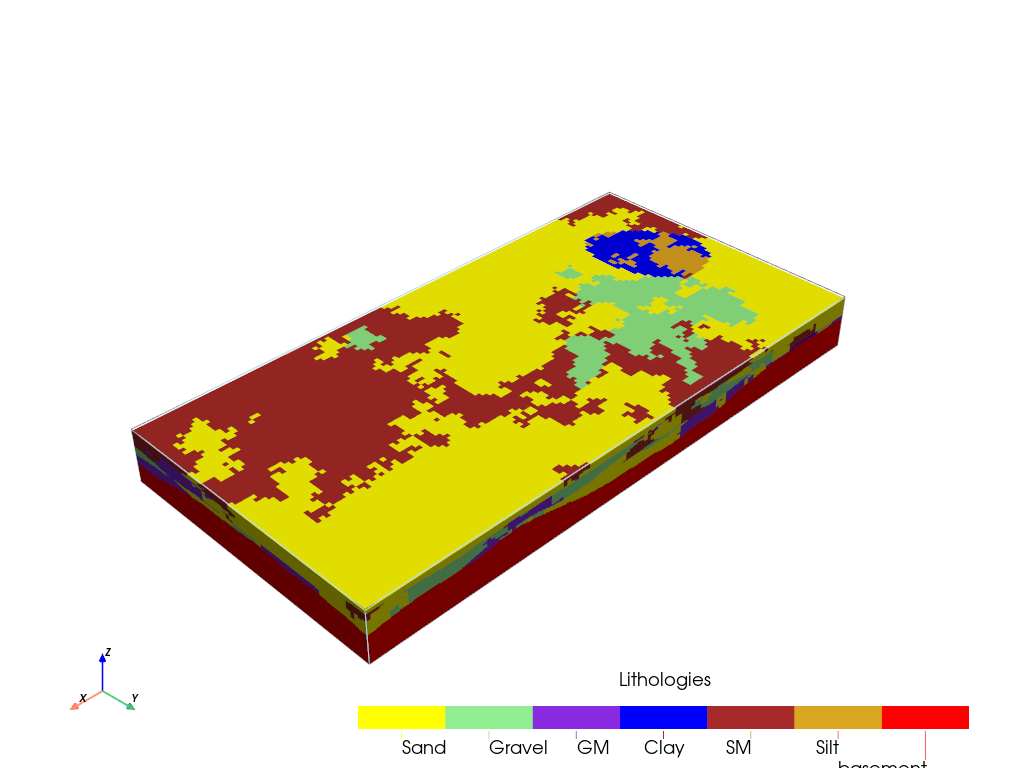

In [17]:
T1.plot_facies()

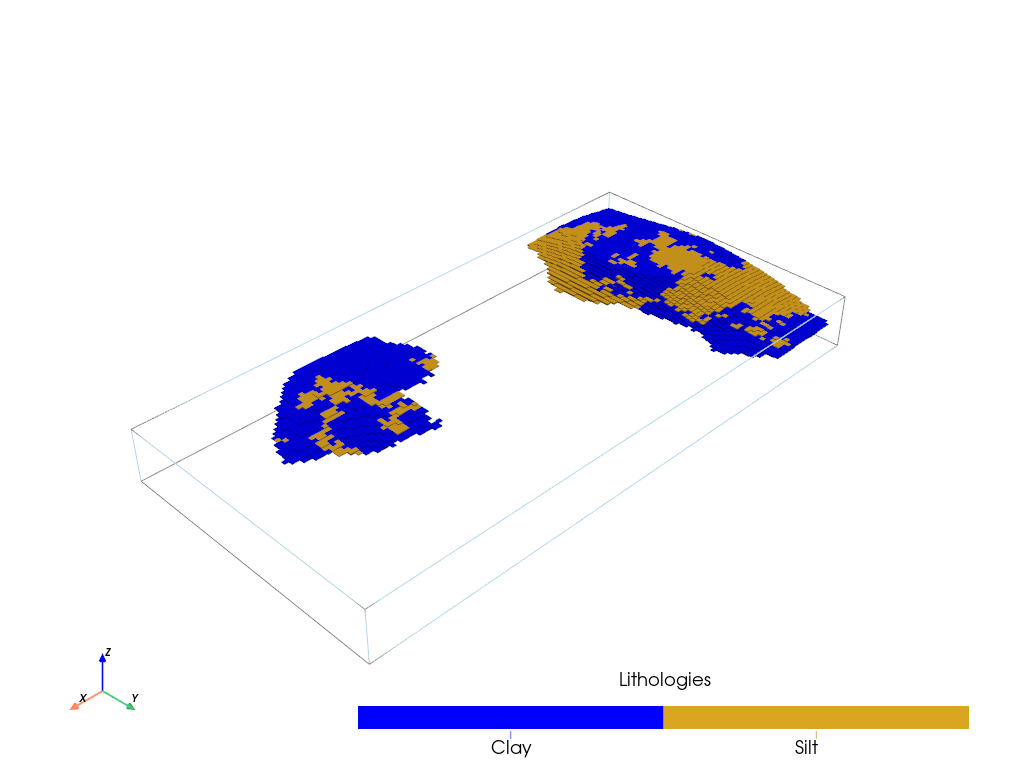

In [18]:
T1.plot_facies(0,0,inside_units=[C])

In [19]:
#prop hd

ix = np.arange(0, nx*sx+0, sx)
n = len(ix)
x_hd = np.array((ix, np.ones(n)*5, np.ones(n)*-10)).T
v = np.ones(n)*-1

In [20]:
permea.x = None
permea.v = None

In [21]:
permea.add_hd(x_hd, v)

In [22]:
T1.compute_prop(1)

### 1 K property models will be modeled ###
homogenous method chosen ! Warning: Some HD can be not respected
homogenous method chosen ! Warning: Some HD can be not respected
### 1 K models done


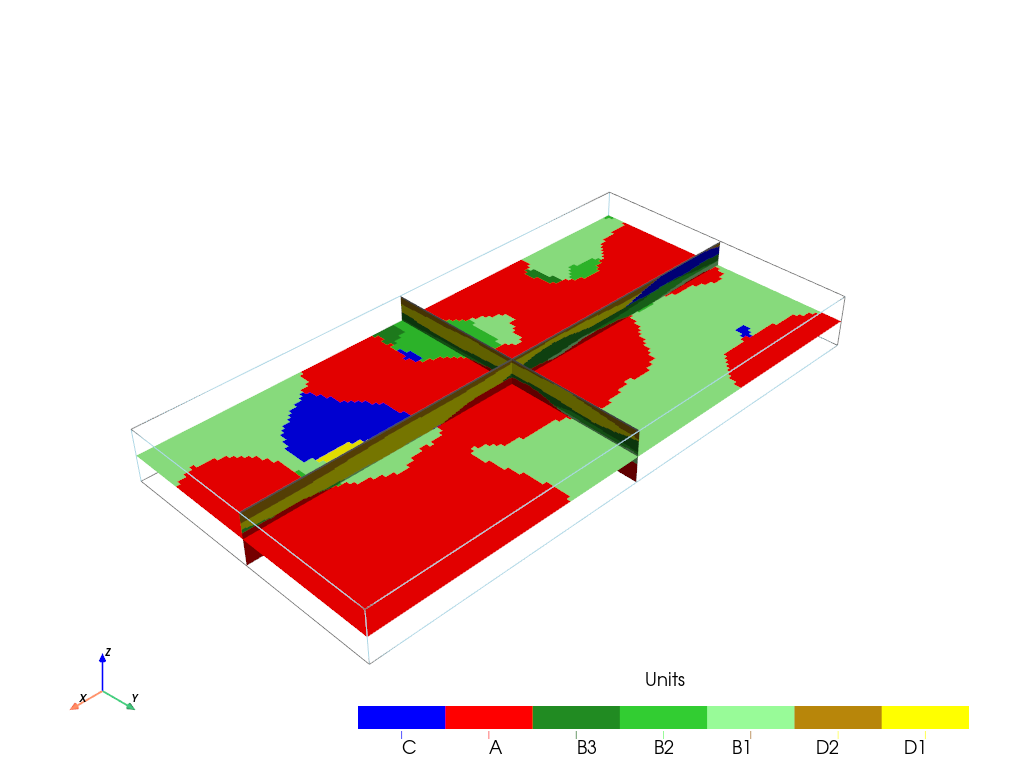

In [23]:
T1.plot_units(slicex=0.5, slicey=0.5, slicez=0.5)

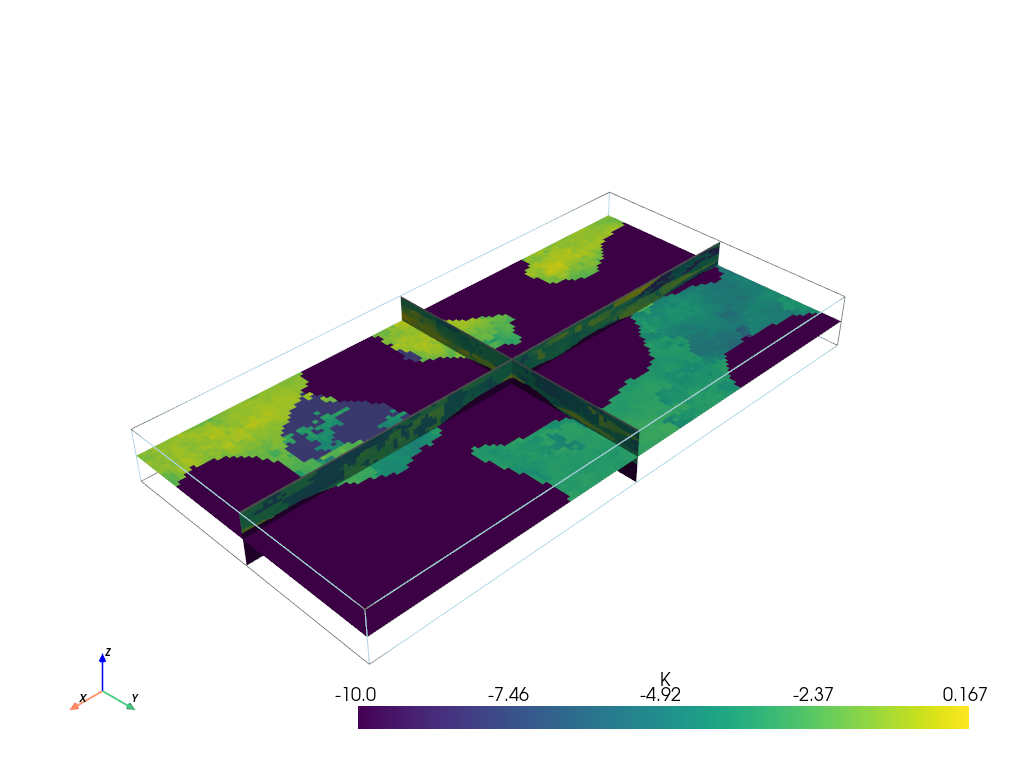

In [24]:
T1.plot_prop("K",0, slicex=0.5,slicey=0.5,slicez=0.5)

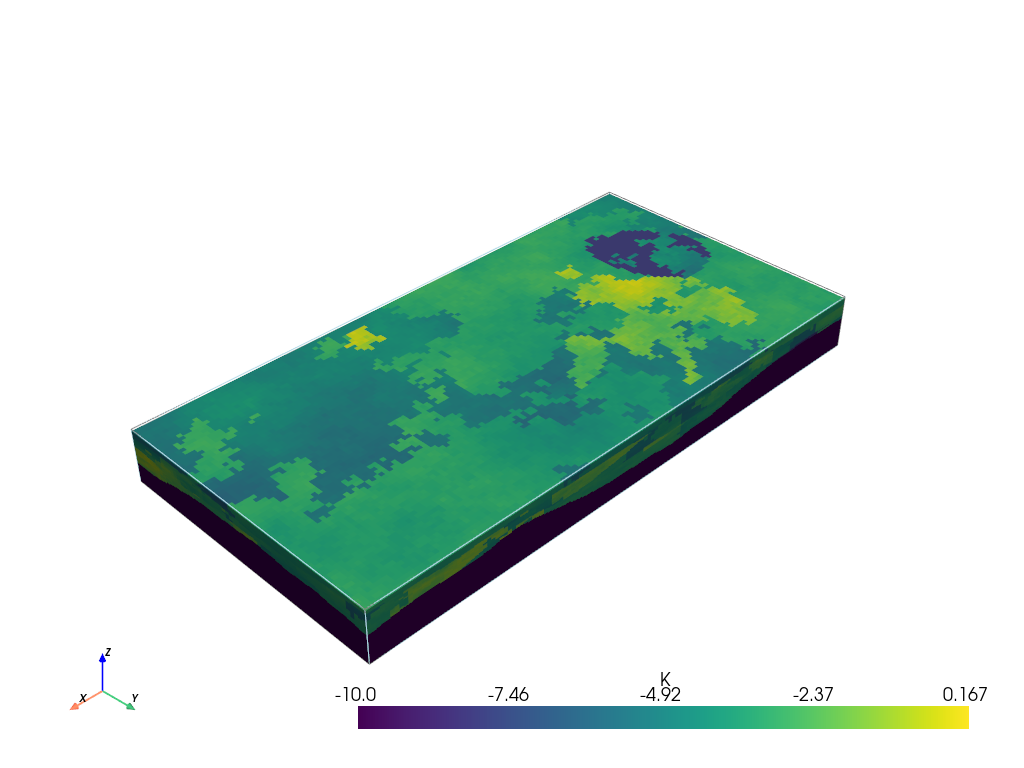

In [25]:
T1.plot_mean_prop("K")

## Inference

### remove boreholes create new ones try to infer parameters

In [26]:
T1.rem_all_bhs()
T1.erase_hd()

Standard boreholes removed
Fake boreholes removed
Geological map boreholes removed
Hard data reset


In [27]:
n = 50

x_positions=(np.random.random(size=n) - x0)*x1
y_positions=(np.random.random(size=n) - y0)*y1
l_bhs=T1.make_fake_bh(x_positions, y_positions)[0][0]
T1.add_bh(l_bhs)

Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Borehole fake goes below model limits, borehole fake depth cut
Borehole fake added
Bore

In [28]:
T1.reprocess()

Hard data reset
##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Pile PD: ordering units
Stratigraphic units have been sorted according to order
Pile PB: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set

 ## Computing distributions for Normal Score Transform ##

Processing ended successfully


## Inference

In ArchPy, inference can be made on the surface only (stratigraphic units).
For this ``ArchPy.infer`` contain several useful functions.

In [29]:
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, fixed, Button
import ArchPy.infer as api
cm = gcm.CovModel1D(elem=[])

``Cm2fit`` allow to design a variogram (covariance) function on a specific given ``ax``

interactive(children=(IntSlider(value=1, description='n_struc', max=10), Output()), _dom_classes=('widget-inte…

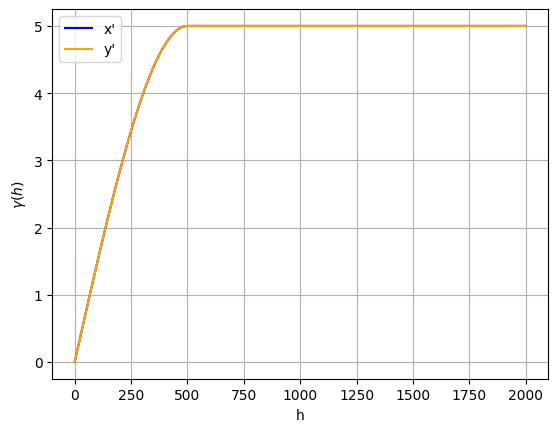

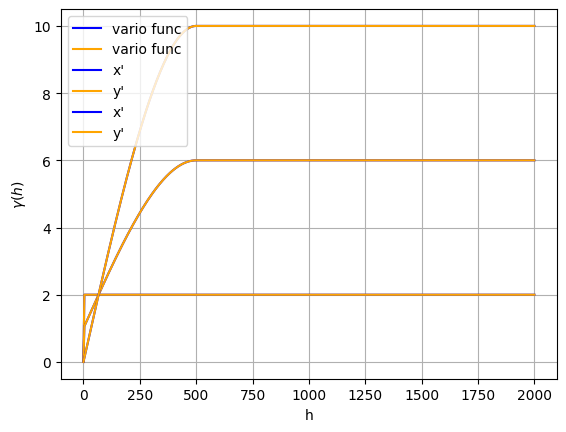

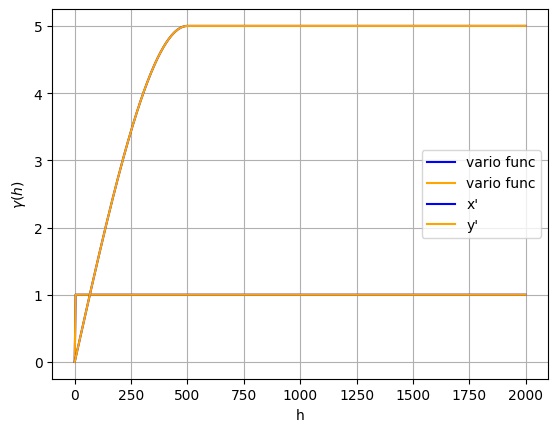

In [39]:
fig, ax = plt.subplots()
test = api.Cm2fit(h_max=2000, r_max=1000, ax=ax)
test.fit(2)

``Var_exp()`` is a function to compute experimental variogram

In [41]:
%matplotlib notebook

fig, ax = plt.subplots()
ev_obj = api.Var_exp(np.array([B.surface.x, B.surface.y]).T, B.surface.z, ax=ax)

ev_obj.fit()

<IPython.core.display.Javascript object>

General parameters - Do not touch except dim if you want to specify the dimension


interactive(children=(IntSlider(value=1, description='dim', max=3, min=1), Output()), _dom_classes=('widget-in…

In [32]:
cm2d = gcm.CovModel2D(elem=[("cubic", {"w":1, "r":[10, 50]})], alpha=45)
ref_2d = geone.multiGaussian.multiGaussianRun(cm2d, (100, 100), output_mode="array")

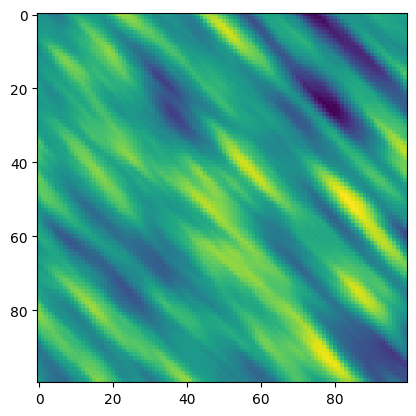

In [33]:
%matplotlib inline
plt.imshow(ref_2d[0])

In [34]:
X,Y  =np.meshgrid(np.arange(100), np.arange(100))
xu = np.array([X.flatten(), Y.flatten()]).T

General parameters - Do not touch except dim if you want to specify the dimension


interactive(children=(IntSlider(value=1, description='dim', max=3, min=1), Output()), _dom_classes=('widget-in…

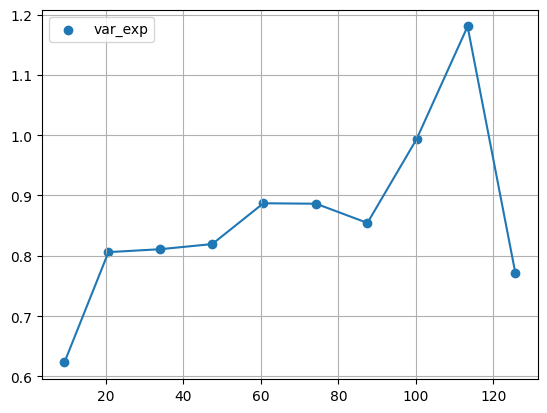

In [35]:
%matplotlib inline

fig, ax = plt.subplots()
ev2d = api.Var_exp(xu[::16], ref_2d.flatten()[::16], ax=ax)
ev2d.fit()
ax.legend()

In [36]:
cm = gcm.CovModel2D(elem=[("cubic", {"w":np.nan, "r":[np.nan, np.nan]})])

``fit_surfaces`` is all-in-one function to estimate surface parameters of a given ArchPy table (Arch_table class).

First an experimental variogram must be chosen, then press continue and after the model variogram can be selected.

When choosing ``auto`` option, an optimal variogram is selected and directly added.

None


interactive(children=(Dropdown(description='unit', options=('D', 'C', 'B', 'A', 'D2', 'D1', 'B3', 'B2', 'B1'),…

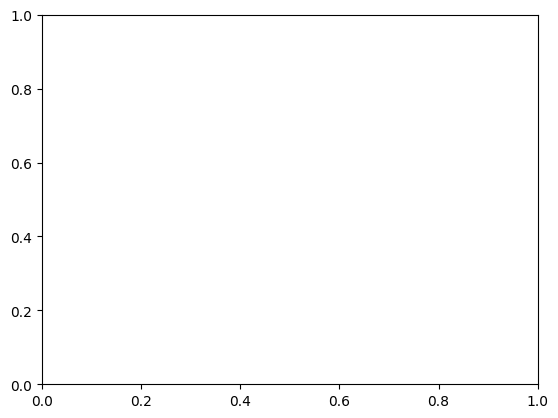

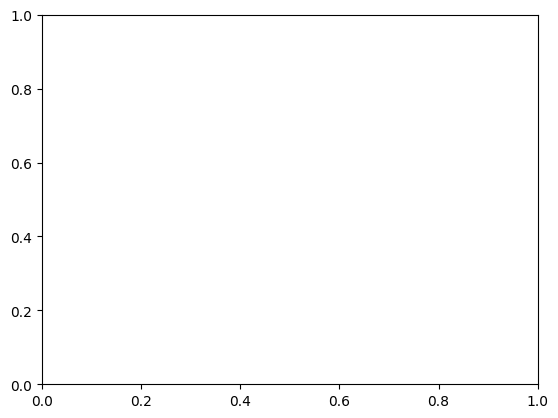

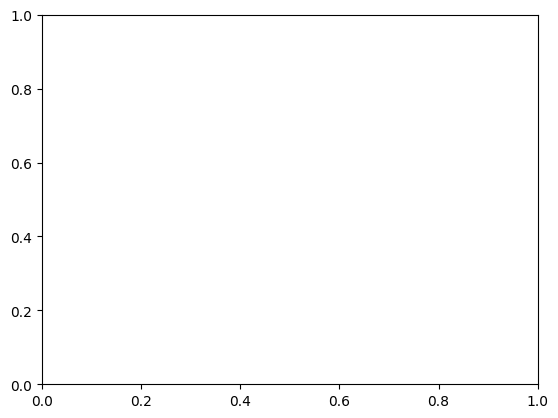

In [42]:
%matplotlib inline
api.fit_surfaces(T1,  hmax=100)

``estimate_surf_params`` is an alias to call ``fit_surfaces`` from the Arch_Table directly

### SURFACE PARAMETERS ESTIMATION ### 

### UNIT : D ### 

Not enough data points
Default covmodel added
Nothing has changed
### UNIT : C ### 

Not enough data points
Default covmodel added
Nothing has changed
### UNIT : B ### 



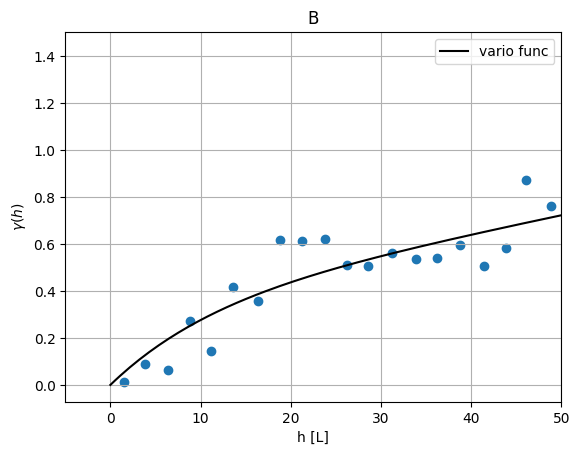

### UNIT : A ### 



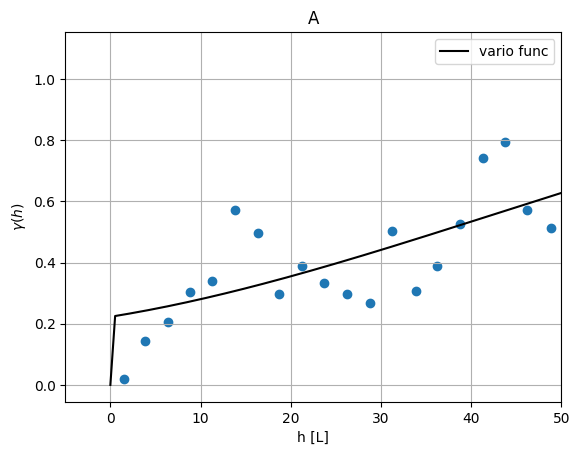

### UNIT : D2 ### 

Not enough data points
Default covmodel added
Nothing has changed
### UNIT : D1 ### 



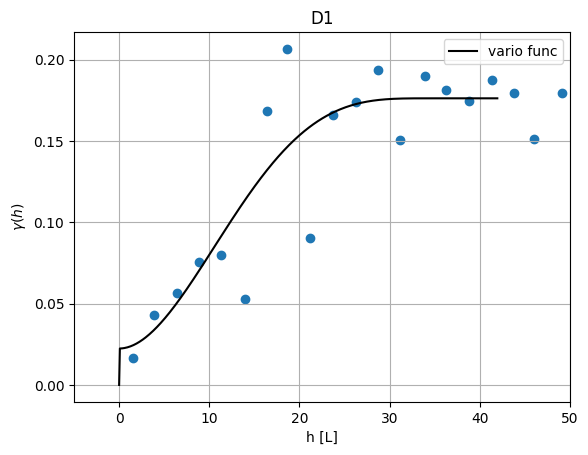

### UNIT : B3 ### 

Not enough data points
Default covmodel added
Nothing has changed
### UNIT : B2 ### 



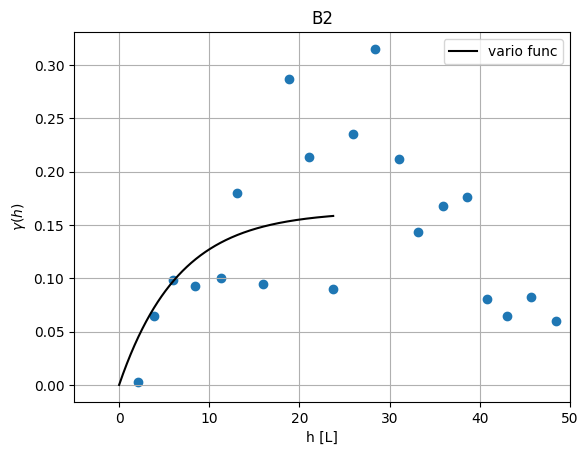

### UNIT : B1 ### 

Not enough data points
Default covmodel added
Nothing has changed


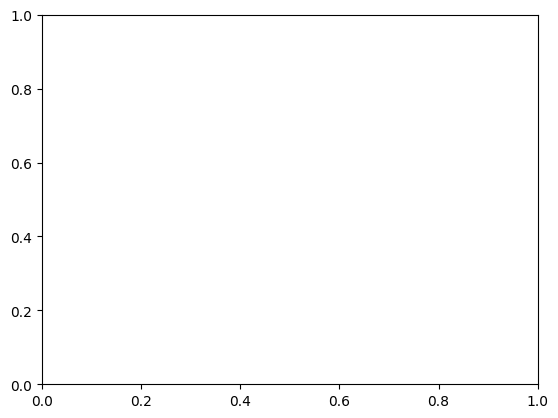

In [38]:
%matplotlib inline
T1.estimate_surf_params(auto=True, hmax=50)